# Stock Evaluation using CAPM model

In [24]:
import pandas as pd
import tushare as ts

tushareToken = ""

ts.set_token(tushareToken)
pro = ts.pro_api()

* 京东方 000725.sz
* 汇顶科技 603160.sh
* 歌尔声学 002241.sz
* 立讯精密 002475.sz
* 蓝思科技 300433.sz
* 欣旺达 300207.sz
-------
* 万科A 000002.SZ
* 中国平安 601318.SH
* 贵州茅台 600519.SH
-------
* 青岛港 601298.SH (✗)

* 万华化学 002415.SZ
* 苏宁易购 002024.SZ
* 格力电器 000651.SZ
* 云南白药 000538.SZ
* 工商银行 601398.SH
* 青岛海尔 600690.SH




In [25]:
# 获取数据

start_date = "20160201"
date1 = "20180101"
date2 = "20180101"
date3 = "20200101"


# BOE = pro.daily(ts_code='000725.SZ', start_date=start_date, end_date=date1)
# HuiDing = pro.daily(ts_code='603160.SH', start_date=start_date, end_date=date1)
# Gor = pro.daily(ts_code='002241.SZ', start_date=start_date, end_date=date1)
# LiXun = pro.daily(ts_code='002475.SZ', start_date=start_date, end_date=date1)
# LanSi = pro.daily(ts_code='300433.SZ', start_date=start_date, end_date=date1)
# XinWangDa = pro.daily(ts_code='300207.sz', start_date=start_date, end_date=date1)

WHHX = pro.daily(ts_code='002415.SZ', start_date=start_date, end_date=date2)
SuNing = pro.daily(ts_code='002024.SZ', start_date=start_date, end_date=date2)
Glee = pro.daily(ts_code='000651.SZ', start_date=start_date, end_date=date2)
YNBY = pro.daily(ts_code='000538.SZ', start_date=start_date, end_date=date2)
ICBC = pro.daily(ts_code='601398.SH', start_date=start_date, end_date=date2)
Haier = pro.daily(ts_code='600690.SH', start_date=start_date, end_date=date2)

wanke = pro.daily(ts_code='000002.SZ', start_date=start_date, end_date=date2)
pingan = pro.daily(ts_code='601318.SH', start_date=start_date, end_date=date2)
maotai = pro.daily(ts_code='600519.SH', start_date=start_date, end_date=date2)

ZZLT = pro.index_daily(ts_code='000300.SH', start_date=start_date, end_date=date2)
# ZZ1000 = pro.index_daily(ts_code='000852.SH', start_date=start_date, end_date=date1)
# ZZLT = pro.index_daily(ts_code='000902.SH', start_date=start_date, end_date=date1)

stock_list = [WHHX, SuNing, Glee, YNBY, ICBC, Haier, wanke, pingan, maotai, ZZLT]

In [26]:
# 仅保留收益率数据，且用日期作为index
# 然后按照日期排序（增序）
for stock in stock_list:
    stock.index = pd.to_datetime(stock.trade_date)
df = pd.concat([stock.pct_chg / 100 for stock in stock_list], axis=1)
df.columns = ['WHHX', 'SuNing', 'Glee', 'YNBY', 'ICBC', 'Haier', 'wanke', 'pingan', 'maotai', 'ZZLT']
df = df.sort_index(ascending=True)
df.describe()

WHHX      SuNing        Glee        YNBY        ICBC       Haier  \
count  468.000000  466.000000  317.000000  355.000000  468.000000  468.000000   
mean     0.002834    0.000509    0.003319    0.001682    0.001135    0.001640   
std      0.020050    0.018613    0.021933    0.016714    0.009297    0.019403   
min     -0.087900   -0.079800   -0.100100   -0.053200   -0.030600   -0.099800   
25%     -0.009125   -0.008900   -0.009200   -0.007550   -0.003825   -0.008325   
50%      0.001300    0.000400    0.000500    0.000800    0.000000    0.000800   
75%      0.012825    0.008250    0.014300    0.010200    0.005000    0.010025   
max      0.067400    0.099800    0.100100    0.100000    0.043600    0.100300   

            wanke      pingan      maotai        ZZLT  
count  362.000000  468.000000  468.000000  468.000000  
mean     0.001259    0.001974    0.002877    0.000708  
std      0.028205    0.014125    0.016397    0.008682  
min     -0.100000   -0.048600   -0.042400   -0.061358  
25%     -0.011275   -0.005000   -0.007100   -0.003306  
50%     -0.000400    0.000600    0.000700    0.000791  
75%      0.008050    0.007475    0.011225    0.004627  
max      0.100200    0.057200    0.082100    0.041164

In [27]:
# 计算累计收益率
df = df.fillna(0)
returns = (df + 1).product() - 1
print('累计收益率：\n', returns)
print('\n标准差：\n', df.std())

累计收益率：
 WHHX      2.425900
SuNing    0.169746
Glee      1.652429
YNBY      0.729443
ICBC      0.666306
Haier     0.972901
wanke     0.369687
pingan    1.403561
maotai    2.605664
ZZLT      0.368207
dtype: float64

标准差：
 WHHX      0.020050
SuNing    0.018573
Glee      0.018109
YNBY      0.014570
ICBC      0.009297
Haier     0.019403
wanke     0.024804
pingan    0.014125
maotai    0.016397
ZZLT      0.008682
dtype: float64


In [28]:
# 显示可用字体
# from matplotlib.font_manager import FontManager
# fm = FontManager()
# mat_fonts = set(f.name for f in fm.ttflist)
# print(mat_fonts)

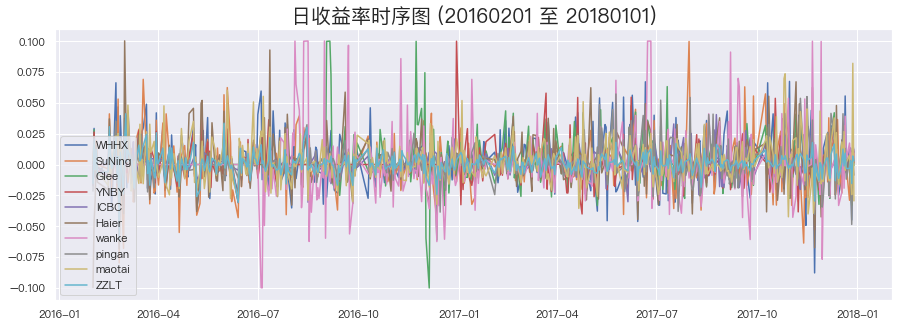

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

title = "日收益率时序图 (" + start_date + " 至 " + date2 +")"

sns.set()
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'SimHei'

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['PingFang HK']

plt.figure(figsize=(15, 5))
for col in df.columns:
    plt.plot(df[col], label=col)
plt.title(title, fontsize=20)
plt.legend()

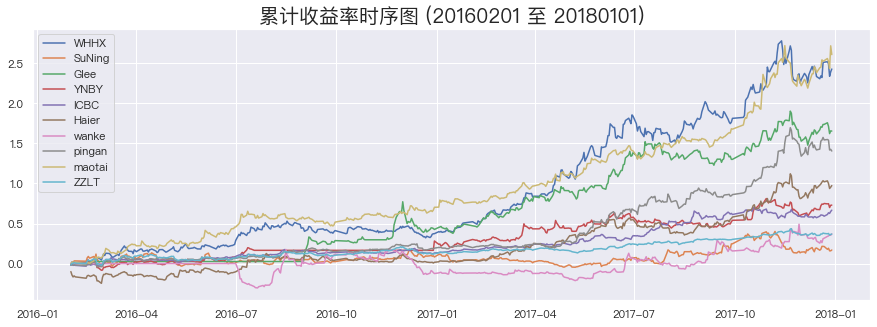

In [30]:
# 累计收益时序图
title = "累计收益率时序图 (" + start_date + " 至 " + date2 +")"
plt.figure(figsize=(15, 5))
for col in df.columns:
    plt.plot((df[col]+1).cumprod()-1, label=col)
plt.title(title, fontsize=20)
plt.legend()

In [31]:
Rf_annual = 0.0385  #以2017年中国一年期的国债利率为无风险利率
rf = (1+Rf_annual)**(1/365)-1  #年利率转化为日利率
#rf = 1.032 ** (1/360) - 1
print(rf)

0.00010350498458366886


In [32]:
# 然后我们需要计算出这些股票和沪深300各自的风险溢酬
df_rp = df - rf
df_rp.head()

WHHX    SuNing      Glee      YNBY      ICBC     Haier  \
trade_date                                                               
2016-02-01 -0.009904 -0.011404 -0.015604 -0.011104 -0.017204 -0.099904   
2016-02-02  0.029196  0.021796  0.028096  0.026196  0.004896 -0.047104   
2016-02-03 -0.008204  0.003596 -0.006404 -0.004204 -0.010004 -0.028304   
2016-02-04  0.012196  0.019396  0.008396  0.004196  0.002396  0.015596   
2016-02-05 -0.009304 -0.000104 -0.008004 -0.005004 -0.002604 -0.014404   

               wanke    pingan    maotai      ZZLT  
trade_date                                          
2016-02-01 -0.000104 -0.021604  0.003096 -0.015393  
2016-02-02 -0.000104  0.014796  0.016096  0.020677  
2016-02-03 -0.000104 -0.011104 -0.004504 -0.004391  
2016-02-04 -0.000104  0.002296  0.006396  0.012146  
2016-02-05 -0.000104 -0.001804 -0.005604 -0.007130

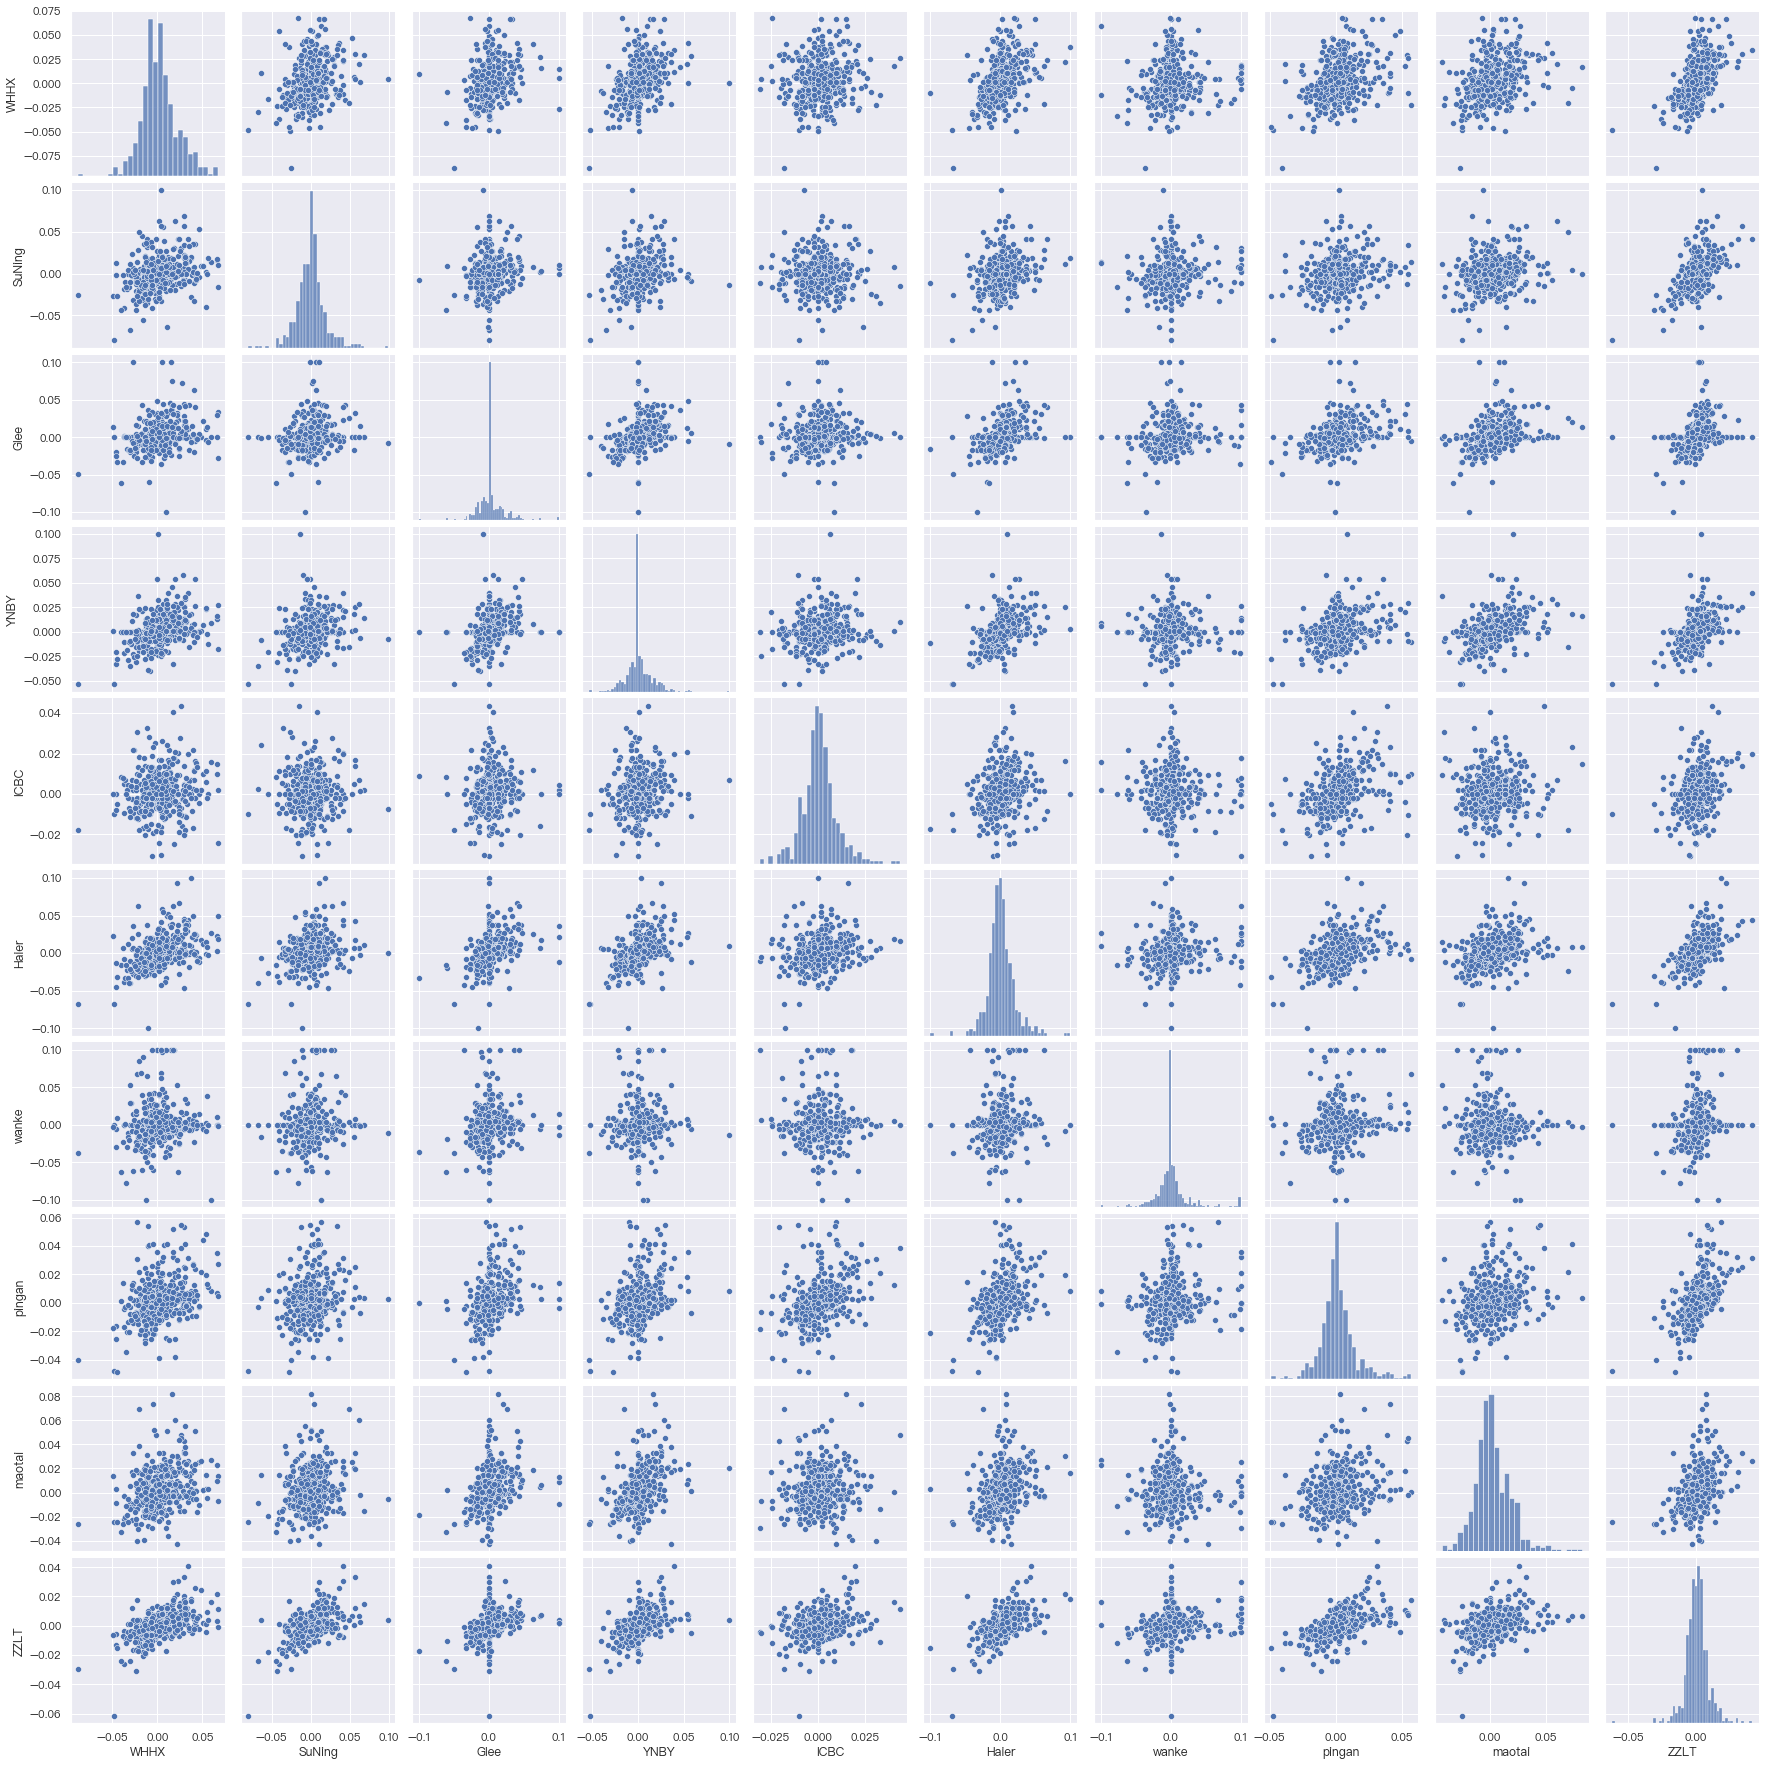

In [35]:
# 接下来，我们看下它们各自风险溢酬之间的关系：
sns.pairplot(df_rp)

In [34]:
import statsmodels.api as sm

stock_names = {
    'WHHX':'万华化学',
    'SuNing': "苏宁易购",
    'Glee': "格力电器",
    'YNBY': "云南白药",
    'ICBC': "工商银行",
    'Haier': "青岛海尔",
    'wanke': "万科 A",
    'pingan': "中国平安",
    'maotai': "贵州茅台",
}
for stock in ['WHHX', 'SuNing', 'Glee', 'YNBY', 'ICBC', 'Haier', 'wanke', 'pingan', 'maotai']:
    # 利用最小二乘法进行线性回归，拟合CAPM模型
    model = sm.OLS(df_rp[stock], sm.add_constant(df_rp['ZZLT']))
    result = model.fit()
    print(stock_names[stock] + '\n')
    print(result.summary())
    print('\n\n')

万华化学

                            OLS Regression Results                            
Dep. Variable:                   WHHX   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     206.1
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           5.78e-39
Time:                        20:05:17   Log-Likelihood:                 1251.8
No. Observations:                 468   AIC:                            -2500.
Df Residuals:                     466   BIC:                            -2491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      2.528   